In [116]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [117]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNEL = 3
EPOCHS = 50

In [118]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "./PlantVillage/",
    shuffle=True,
    image_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    
)

Found 2152 files belonging to 3 classes.


In [119]:
class_name = dataset.class_names
class_name

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [120]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[0 1 1 0 1 2 1 1 0 1 0 1 0 1 1 2 2 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1]


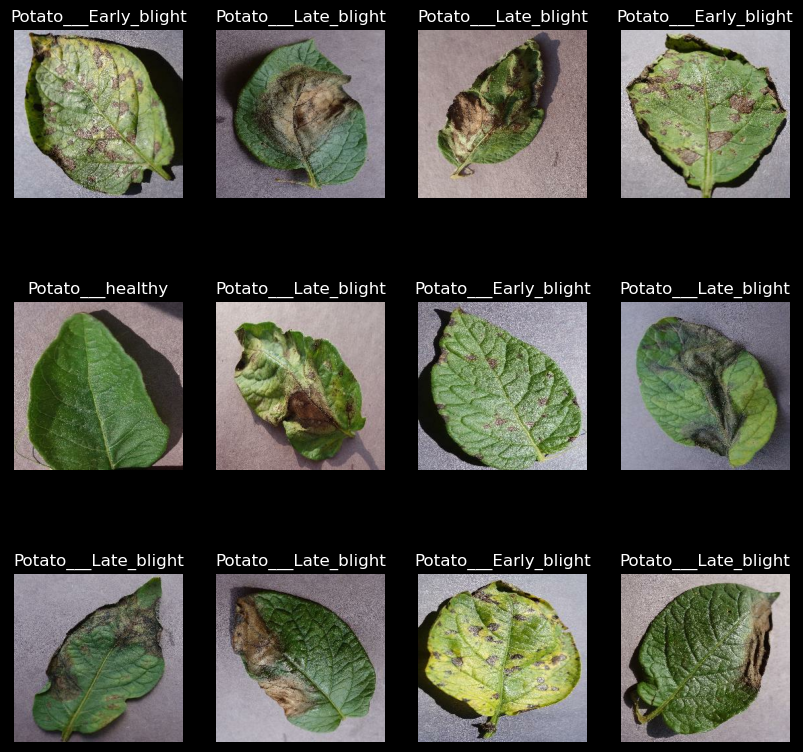

In [121]:
plt.figure(figsize=(10, 10))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_name[label_batch[i]])
        plt.axis("off")

In [122]:
len(dataset)

68

In [123]:
train_ds = dataset.take(54)
test_ds = dataset.skip(54)
val_ds = test_ds.take(6)
test_ds = test_ds.skip(6)

In [124]:
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split=True, shuffle = True,shuffle_size = 10000):
    ds_size = len(ds)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    train_size = int(train_split*ds_size)
    val_size = int(val_split*ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [125]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [126]:
print(len(train_ds), len(val_ds), len(test_ds))

54 6 8


In [127]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)


In [128]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [129]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [130]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNEL)
n_classes = 3
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = (IMAGE_SIZE, IMAGE_SIZE)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax')
])

model.build(input_shape= input_shape)

In [131]:
model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_13 (Sequential)  (32, 256, 256, 3)         0         
                                                                 
 sequential_14 (Sequential)  (None, 256, 256, 3)       0         
                                                                 
 conv2d_24 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                

In [132]:
model.compile(
    optimizer = 'adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [133]:
history = model.fit(
    train_ds,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    verbose = 1,
    validation_data=val_ds
)

Epoch 1/50


54/54 [==============================] - 33s 560ms/step - loss: 0.9146 - accuracy: 0.4954 - val_loss: 0.8868 - val_accuracy: 0.4271
Epoch 2/50
54/54 [==============================] - 29s 534ms/step - loss: 0.6788 - accuracy: 0.6800 - val_loss: 0.4267 - val_accuracy: 0.8229
Epoch 3/50
54/54 [==============================] - 29s 539ms/step - loss: 0.3863 - accuracy: 0.8443 - val_loss: 0.2858 - val_accuracy: 0.8854
Epoch 4/50
54/54 [==============================] - 29s 537ms/step - loss: 0.3031 - accuracy: 0.8750 - val_loss: 0.2438 - val_accuracy: 0.9010
Epoch 5/50
54/54 [==============================] - 29s 536ms/step - loss: 0.2457 - accuracy: 0.9051 - val_loss: 0.2062 - val_accuracy: 0.9427
Epoch 6/50
54/54 [==============================] - 29s 537ms/step - loss: 0.1889 - accuracy: 0.9219 - val_loss: 0.1492 - val_accuracy: 0.9375
Epoch 7/50
54/54 [==============================] - 29s 530ms/step - loss: 0.2013 - accuracy: 0.9219 - val_loss: 0.1599 - val_accuracy: 0.9323
Epoch 8/50

In [134]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [135]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [136]:
acc = history.history['accuracy']
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

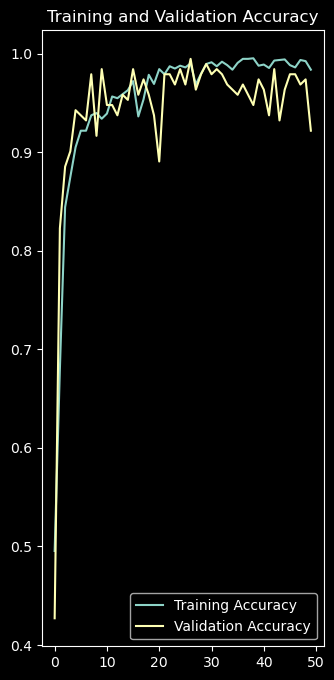

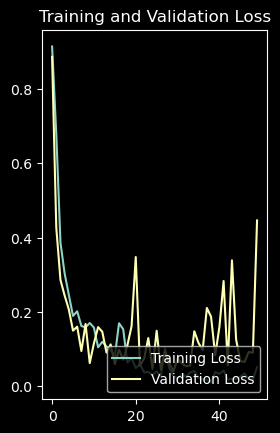

In [137]:
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), acc, label = "Training Accuracy")
plt.plot(range(EPOCHS), val_acc, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Accuracy")
plt.show()

plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, label = "Training Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = 'lower right')
plt.title("Training and Validation Loss")
plt.show()

first image to predict
first iamge's actual label: Potato___Late_blight
1/1 [==============================] - 0s 197ms/step
predict image label:  Potato___Early_blight


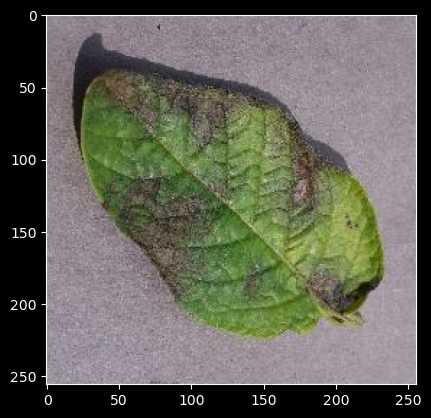

In [138]:
for image_batch, label_batch in test_ds.take(1):
    first_image = image_batch[0].numpy().astype("uint8")
    first_label = label_batch[0]
    
    print("first image to predict")
    plt.imshow(first_image)
    print("first iamge's actual label:", class_name[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predict image label: ",class_name[np.argmax(batch_prediction[0])])

In [139]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2)
    return predicted_class, confidence

In [144]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_name[labels[i]]
        
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class}. \n Confidence: {confidence}%")
        plt.axis("off")

1/1 [==============================] - 0s 25ms/step


In [141]:
#model_version=1
#model.save(f"./models/{model_version}")